In [6]:
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1er entrainement, nos données, avec gyro

In [7]:
# Function to extract features from JSON data
def extract_features(data):
    gyro = np.array([entry['gyro'] for entry in data])
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for gyro and accel)
    features = []
    for sensor_data in [gyro, accel]:
        features.append(np.mean(sensor_data, axis=0))
        features.append(np.std(sensor_data, axis=0))
        features.append(np.min(sensor_data, axis=0))
        features.append(np.max(sensor_data, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y = load_data(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

print("RandomForestClassifier")
# Evaluate the model
print(classification_report(y_test, y_pred))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.92      0.97      0.94        34

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [8]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification")
print(classification_report(y_test, y_pred_svm))


SVM Classification
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.85      1.00      0.92        34

    accuracy                           0.89        54
   macro avg       0.93      0.85      0.87        54
weighted avg       0.91      0.89      0.88        54



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearch:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Model Classification Report")
print(classification_report(y_test, y_pred_best))


Best parameters found by GridSearch:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Classification Report
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.89      0.97      0.93        34

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



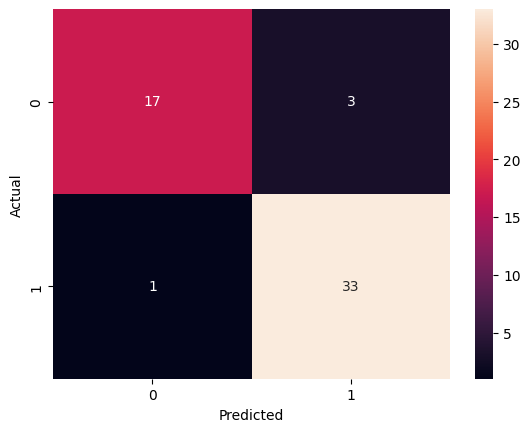

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 2eme, entrainement sans gyro, nos données, sans seuil

In [12]:
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Function to extract features from accelerometer data only
def extract_features(data):
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for accel)
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])  # Only use accel data
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y = load_data(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RandomForestClassifier")
print(classification_report(y_test, y_pred))


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      0.94      0.93        34

    accuracy                           0.91        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



# 3eme, nos données, avec seuil, sans gyro

In [13]:
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Function to extract features from accelerometer data only
def extract_features(data):
    # Only use the 'accel' data (exclude 'gyro')
    accel = np.array([entry['accel'] for entry in data])
    
    # Simple feature extraction (mean, std, min, max for accel)
    features = []
    features.append(np.mean(accel, axis=0))
    features.append(np.std(accel, axis=0))
    features.append(np.min(accel, axis=0))
    features.append(np.max(accel, axis=0))
    
    return np.concatenate(features)

# Load and process the dataset
def load_data(folder):
    X = []
    y = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.json'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as f:
                json_data = json.load(f)
                features = extract_features(json_data['data'])  # Only use accel data
                X.append(features)
                y.append(1 if json_data['iscrash'] else 0)
    
    return np.array(X), np.array(y)

# Path to the folder containing the JSON files
folder_path = './dataNous'

# Load data
X, y = load_data(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get prediction probabilities (since we need scores to apply thresholds)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (iscrash = 1)

# Function to predict with a threshold
def predic_with_threshold(probs, threshold):
    return np.array(probs > threshold, dtype=int)

# List of thresholds to test
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]  # Thresholds between 0 and 1 since we're dealing with probabilities

# Loop through each threshold and print the classification report
for threshold in thresholds:
    y_pred_threshold = predic_with_threshold(y_prob, threshold)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n")

# Evaluate the default RandomForestClassifier (using the default threshold of 0.5)
y_pred_default = clf.predict(X_test)

print("RandomForestClassifier (Default Threshold)")
print(classification_report(y_test, y_pred_default))


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      0.94      0.93        34

    accuracy                           0.91        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



Threshold: 0.6
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.94      0.94      0.94        34

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



Threshold: 0.7
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.97      0.94      0.96        34

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95  

# 4eme isolation forest 